In [146]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [147]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [148]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [149]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [150]:
# reflect an existing database into a new model
base=automap_base()
#reflect the tables
base.prepare(autoload_with=engine)

In [151]:
# View all of the classes that automap found
base.classes.keys()

['measurement', 'station']

In [152]:
# Save references to each table
measurement= base.classes.measurement
station=base.classes.station

In [153]:
# Create our session (link) from Python to the DB
session=Session(engine)

# Exploratory Precipitation Analysis

In [154]:
# Find the most recent date in the data set.
recent_date=session.query(measurement.date).order_by(measurement.date.desc()).first()
recent_date


('2017-08-23',)

In [155]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
year_ago=dt.date(2017,8,23)-dt.timedelta(days=365)
# print(year_ago)

# Perform a query to retrieve the data and precipitation scores
prec_query = session.query(measurement.prcp , measurement.date).filter(measurement.date>year_ago).order_by(measurement.date).all()
# prec_query

In [156]:
# Save the query results as a Pandas DataFrame. Explicitly set the column names
# Sort the dataframe by date
df = pd.DataFrame(prec_query, columns=['Precipitation', 'Date'])
df.head()

,Precipitation,Date
0,0.08,2016-08-24
1,2.15,2016-08-24
2,2.28,2016-08-24
3,NaN,2016-08-24
4,1.22,2016-08-24


<Axes: xlabel='Date', ylabel='Inches'>

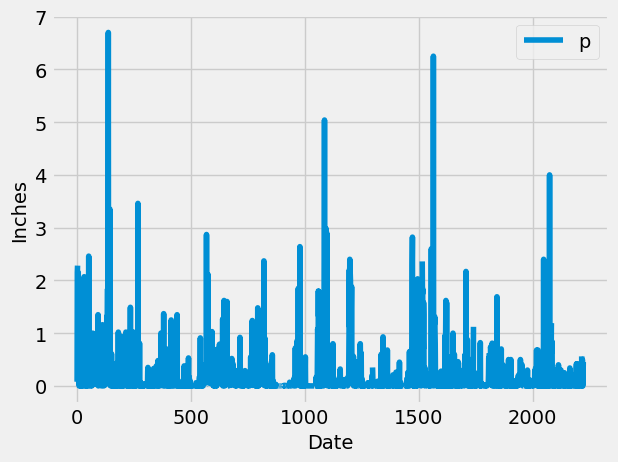

In [157]:
# Use Pandas Plotting with Matplotlib to plot the data
plot_1=df.plot()
plt.xlabel("Date")
plt.ylabel("Inches")
label=("precipitation")
plt.legend(label)
plot_1

In [158]:
# Use Pandas to calculate the summary statistics for the precipitation data
summary_stat=df.describe()
summary_stat

,Precipitation
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [159]:
# Design a query to calculate the total number of stations in the dataset
num_stations=session.query(measurement.station).distinct().count()
num_stations

9

In [160]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
active_stations=session.query(measurement.station,func.count(measurement.station)).group_by(measurement.station).order_by(func.count(measurement.station).desc()).all()
active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [161]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
temp_stations= session.query(func.min(measurement.tobs), func.max(measurement.tobs),func.avg(measurement.tobs)).filter(measurement.station == 'USC00519281' ).all()
temp_stations

[(54.0, 85.0, 71.66378066378067)]

In [162]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
temp_query=session.query(measurement.tobs).filter(measurement.station == 'USC00519281' ).filter(measurement.date >= '2017,8,23').all()
# temp_query

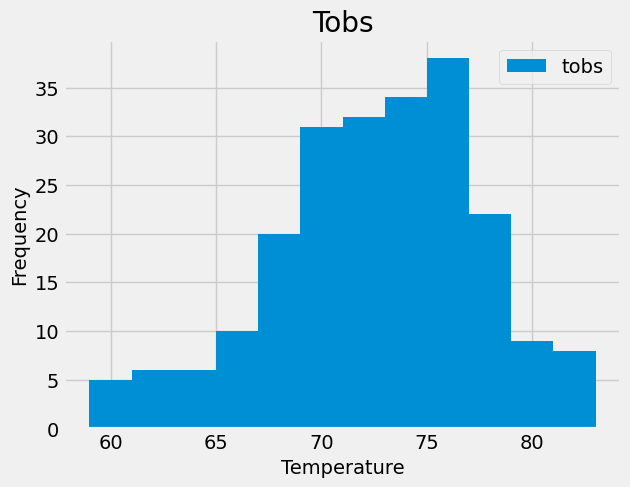

In [163]:
plot_2 = pd.DataFrame(temp_query , columns = ['Tobs'])
plot_2.hist( bins = 12)
plt.xlabel("Temperature")
plt.ylabel("Frequency")
label = ["tobs"]
plt.legend(label)
plt.show()

# Close Session

In [164]:
# Close Session
session.close()